In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
import pandas as pd
salmonella_df = pd.read_csv('sedata.csv')
salmonella_df.head()

C:\Users\Betha\AppData\Local\Temp\ipykernel_12380\1342433907.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  salmonella_df = pd.read_csv('sedata.csv')


,#Organism group,Strain,Isolate identifiers,Serovar,Isolate,Create date,Location,Isolation source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,Salmonella enterica,FDA136442,"""CFSAN013639"",""FDA00000074"",""FDA136442"",""SRS72...","II 42:z:1,5 (Detroit)",PDT000041088.3,2015-02-10T19:09:48Z,Albania,mullen leaves,environmental/other,NaN,NaN,NaN,SAMN02843459,GCA_010680205.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=42:z:1,5,serotype=II 42:z:1,5"
1,Salmonella enterica,FDA151187,"""CFSAN013730"",""FDA00000165"",""FDA151187"",""SRS73...",Warragul,PDT000041829.3,2015-02-10T19:09:57Z,Albania,sage,environmental/other,NaN,NaN,NaN,SAMN02843550,GCA_010659265.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=6,14:g,m:-,serotype=Warragul"
2,Salmonella enterica,FDA324859,"""CFSAN014351"",""FDA00000786"",""FDA324859"",""SRS74...",Javiana,PDT000043925.3,2015-02-10T18:10:27Z,Albania,sage,environmental/other,NaN,NaN,NaN,SAMN02844171,GCA_011075705.1,mdsB=COMPLETE,"antigen_formula=9:l,z28:1,5,serotype=Javiana"
3,Salmonella enterica,FDA253298,"""CFSAN014102"",""FDA00000537"",""FDA253298"",""SRS78...",Miami,PDT000045555.3,2015-02-10T18:10:37Z,Albania,sage,environmental/other,NaN,NaN,NaN,SAMN02843922,GCA_010698665.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:a:1,5,serotype=Miami"
4,Salmonella enterica,FDA429526,"""CFSAN014697"",""FDA00001132"",""FDA429526"",""SRS92...",Simi,PDT000062220.2,2015-04-24T22:11:34Z,Albania,sage,environmental/other,NaN,NaN,NaN,SAMN02844517,GCA_010970975.1,NaN,"antigen_formula=3,10:r:e,n,z15,serotype=Simi"


In [6]:
   print(salmonella_df.iloc[:, 6].unique())  # See unique values in column 6
   

['Albania' 'Algeria' 'American Samoa' ... 'Zimbabwe:Norton'
 'Zimbabwe:Nyabira' 'Zimbabwe:Ruwa']


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with warning suppressed
salmonella_df = pd.read_csv('sedata.csv', low_memory=False)

# Examine the dataset structure
print("Dataset shape:", salmonella_df.shape)
print("\nColumn names:")
print(salmonella_df.columns.tolist())

# Identify the name of column 6 (index 6)
col_name = salmonella_df.columns[6]
print(f"\nColumn 6 name: '{col_name}'")

# Examine the problematic column
print(f"\nData types in column '{col_name}':")
print(salmonella_df[col_name].apply(type).value_counts())

# Look at some sample values
print(f"\nSample values from '{col_name}':")
print(salmonella_df[col_name].sample(10).tolist())

# Check for missing values
print(f"\nMissing values in '{col_name}': {salmonella_df[col_name].isna().sum()}")

# Check for numeric conversion potential
numeric_conversion = pd.to_numeric(salmonella_df[col_name], errors='coerce')
print(f"\nValues that couldn't be converted to numeric: {numeric_conversion.isna().sum()}")

Dataset shape: (558819, 16)

Column names:
['#Organism group', 'Strain', 'Isolate identifiers', 'Serovar', 'Isolate', 'Create date', 'Location', 'Isolation source', 'Isolation type', 'SNP cluster', 'Min-same', 'Min-diff', 'BioSample', 'Assembly', 'AMR genotypes', 'Computed types']

Column 6 name: 'Location'

Data types in column 'Location':
Location
<class 'str'>      493788
<class 'float'>     65031
Name: count, dtype: int64

Sample values from 'Location':
['USA:GA', 'USA', 'USA', 'USA', 'USA', nan, 'USA', 'USA', 'India: Kolkata', 'USA:PA']

Missing values in 'Location': 65031

Values that couldn't be converted to numeric: 558819


In [12]:
# How many unique serovars?
len(salmonella_df['Serovar'].unique())
len('Serovar')

7

In [6]:
# Get lists of unique values for columns of interest
serovars_list = salmonella_df['Serovar'].unique()
print(serovars_list)

['II 42:z:1,5 (Detroit)' 'Warragul' 'Javiana' ... 'I 7:e,h:1,5'
 'I 7:c:1,5' 'I 39:y:1,2']


In [16]:
locations = salmonella_df['Location'].unique()
print(locations)

['Albania' 'Algeria' 'American Samoa' ... 'Zimbabwe:Norton'
 'Zimbabwe:Nyabira' 'Zimbabwe:Ruwa']


In [14]:
location_counts = salmonella_df['Location'].value_counts()
print(location_counts)

Location
USA                                                               228661
United Kingdom: United Kingdom                                     62029
Canada                                                             13206
USA:CA                                                              7865
USA:TX                                                              6275
                                                                   ...  
Australia:Queensland                                                   1
Viet Nam: Hanoi, Thanh Tri district Quang market                       1
Viet Nam: Hanoi, Thanh Xuan district Khuong Dinh market                1
Viet Nam: Hanoi, Thanh Xuan district no. 371 Khuong Trung str.         1
Viet Nam: Hung Yen Province                                            1
Name: count, Length: 1280, dtype: int64


In [16]:
usa_samples = salmonella_df[salmonella_df['Location'] == 'USA']
print(usa_samples)

            #Organism group        Strain           Isolate identifiers  \
158134  Salmonella enterica    Gen_001782      "Gen_001782","SRS426891"   
158135  Salmonella enterica    Gen_001783      "Gen_001783","SRS426892"   
158136  Salmonella enterica    Gen_001784      "Gen_001784","SRS426918"   
158137  Salmonella enterica    Gen_001792      "Gen_001792","SRS426919"   
158138  Salmonella enterica       FSF0059         "FSF0059","SRS515147"   
...                     ...           ...                           ...   
386790  Salmonella enterica  PNUSAS376025  "PNUSAS376025","SRS18745397"   
386791  Salmonella enterica  PNUSAS377104  "PNUSAS377104","SRS18745398"   
386792  Salmonella enterica  PNUSAS377870  "PNUSAS377870","SRS18746131"   
386793  Salmonella enterica  PNUSAS377873  "PNUSAS377873","SRS18746192"   
386794  Salmonella enterica  PNUSAS377871  "PNUSAS377871","SRS18746244"   

                       Serovar         Isolate           Create date Location  \
158134            

In [22]:
portugal_samples = df[df['Location'] == 'Portugal']
print(portugal_samples)

           #Organism group     Strain  \
71151  Salmonella enterica    FMA0096   
71152  Salmonella enterica  FDA366147   
71153  Salmonella enterica        NaN   
71154  Salmonella enterica        NaN   
71155  Salmonella enterica  FDA211441   
...                    ...        ...   
71310  Salmonella enterica      S1-2A   
71311  Salmonella enterica      S2-1A   
71312  Salmonella enterica      S2-2C   
71313  Salmonella enterica      S2-3B   
71314  Salmonella enterica      S4-3C   

                                     Isolate identifiers      Serovar  \
71151                              "FMA0096","SRS565884"  Typhimurium   
71152  "CFSAN014505","FDA00000940","FDA366147","SRS82...       Pomona   
71153                                 "ERS787513","S199"          NaN   
71154                                 "ERS787514","S280"          NaN   
71155  "CFSAN013931","FDA00000366","FDA211441","SRS22...  Typhimurium   
...                                                  ...          ...

In [31]:
sage_samples = df[df['Isolation source'] == 'sage']
print(sage_samples)
len(sage_samples)

            #Organism group           Strain  \
1       Salmonella enterica        FDA151187   
2       Salmonella enterica        FDA324859   
3       Salmonella enterica        FDA253298   
4       Salmonella enterica        FDA429526   
6       Salmonella enterica      FDA521501-1   
7       Salmonella enterica      FDA521501-2   
12      Salmonella enterica      FDA379307-1   
13      Salmonella enterica      FDA379307-2   
47850   Salmonella enterica        FDA167384   
47854   Salmonella enterica        FDA117843   
47855   Salmonella enterica        FDA128780   
56052   Salmonella enterica      FDA107028-A   
56053   Salmonella enterica      FDA107028-B   
84610   Salmonella enterica        FDA266633   
408329  Salmonella enterica  FL_FLDACS-23403   

                                      Isolate identifiers  \
1       "CFSAN013730","FDA00000165","FDA151187","SRS73...   
2       "CFSAN014351","FDA00000786","FDA324859","SRS74...   
3       "CFSAN014102","FDA00000537","FDA253298",

15

In [17]:
!pip install fuzzywuzzy[speedup]

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 17.8 MB/s eta 0:00:00

   -------------------- ------------------- 2/4 [Levenshtein]
   ---------------------------------------- 4/4 [python-levenshtein]



In [25]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
print(fuzz.ratio('sage', 'sage leaves'))

53


In [64]:
def group_similar_strings_sage(strings, threshold=80):
    'sage'
    'sage leaves'
    'fancy sage'

In [28]:
from datetime import 

In [61]:
filtered_from_2010 = salmonella_df[salmonella_df['Create date'].str.contains('2010-')]
grouped_from_2010 = filtered_from_2010.groupby('Create date')
filtered_from_2011 = salmonella_df[salmonella_df['Create date'].str.contains('2011-')]
grouped_from_2011 = filtered_from_2011.groupby('Create date')
filtered_from_2012 = salmonella_df[salmonella_df['Create date'].str.contains('2012-')]
grouped_from_2012 = filtered_from_2012.groupby('Create date')

In [69]:
from rapidfuzz import fuzz

In [76]:
all_sage = ['sage', 'sage leaves', 'fancy sage']
grouped = all_sage
print(list(all_sage))
len(all_sage)

['sage', 'sage leaves', 'fancy sage']


3

In [78]:
salmonella_df.groupby('Create date').size()

Create date
2010-05-12T22:44:00Z    15
2010-11-18T23:44:00Z     3
2010-11-19T00:12:00Z     1
2010-11-19T00:13:00Z     4
2010-11-19T00:15:00Z     2
                        ..
2023-08-31T01:02:31Z     5
2023-08-31T01:02:32Z     5
2023-08-31T01:02:33Z     3
2023-08-31T01:02:34Z     5
2023-08-31T01:02:35Z     2
Length: 182136, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

source_counts_2012 = grouped_from_2012['Isolation source'].value_counts()

In [85]:
df_2010 = salmonella_df[salmonella_df['Create date'].str.contains('2010-', case=False, na=False)]
df_2011 = salmonella_df[salmonella_df['Create date'].str.contains('2011-', case=False, na=False)]
df_2012 = salmonella_df[salmonella_df['Create date'].str.contains('2012-', case=False, na=False)]
df_2013 = salmonella_df[salmonella_df['Create date'].str.contains('2013-', case=False, na=False)]
df_2014 = salmonella_df[salmonella_df['Create date'].str.contains('2014-', case=False, na=False)]
df_2015 = salmonella_df[salmonella_df['Create date'].str.contains('2015-', case=False, na=False)]
df_2016 = salmonella_df[salmonella_df['Create date'].str.contains('2016-', case=False, na=False)]
df_2017 = salmonella_df[salmonella_df['Create date'].str.contains('2017-', case=False, na=False)]
df_2018 = salmonella_df[salmonella_df['Create date'].str.contains('2018-', case=False, na=False)]
df_2019 = salmonella_df[salmonella_df['Create date'].str.contains('2019-', case=False, na=False)]
df_2020 = salmonella_df[salmonella_df['Create date'].str.contains('2020-', case=False, na=False)]
df_2021 = salmonella_df[salmonella_df['Create date'].str.contains('2021-', case=False, na=False)]
df_2022 = salmonella_df[salmonella_df['Create date'].str.contains('2022-', case=False, na=False)]
df_2023 = salmonella_df[salmonella_df['Create date'].str.contains('2023-', case=False, na=False)]

In [89]:
len(df_2010), len(df_2011), len(df_2012), len(df_2013), len(df_2014), len(df_2015), len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022), len(df_2023)

(26,
 8,
 189,
 551,
 3922,
 26538,
 19090,
 46067,
 69450,
 80948,
 83170,
 86595,
 89975,
 52290)

In [95]:
strain_counts_2012 = df_2012['Isolation source'].value_counts().sort_values(ascending=False)
print(strain_counts_2012)

Isolation source
environmental swab                                                           33
stool                                                                        16
peppercorn                                                                    5
lunch meat                                                                    5
ground turkey                                                                 3
pistachio                                                                     2
Turkey, Ground                                                                2
chicken breast                                                                2
pepper salami                                                                 2
chicken (Gallus gallus)                                                       2
typhoid carrier                                                               1
feces                                                                         1
fish food              

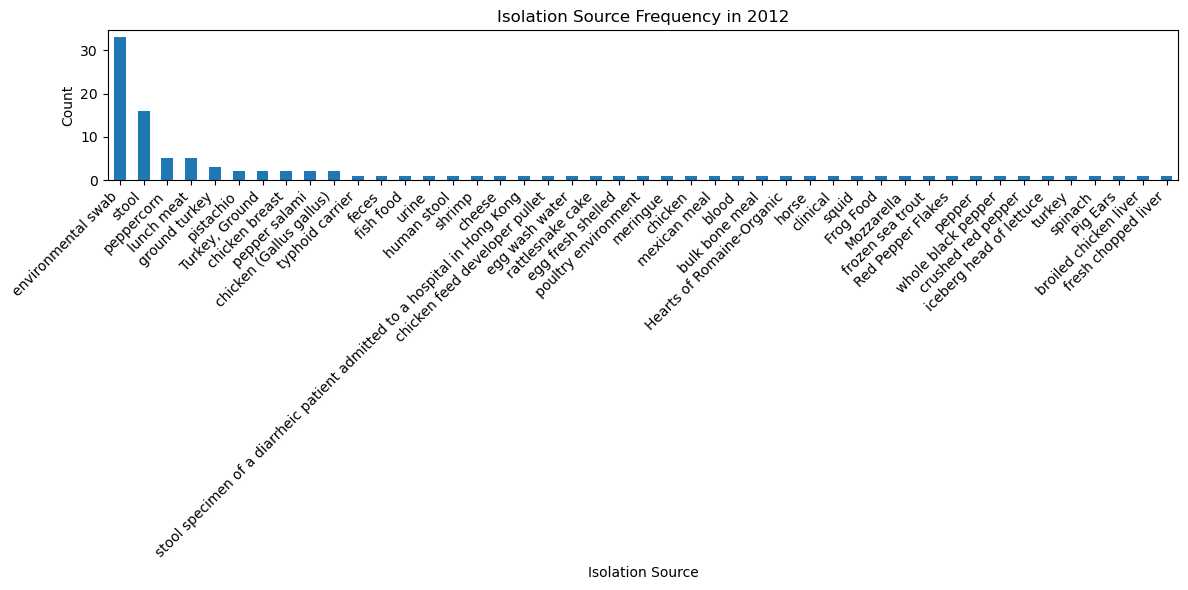

In [98]:
plt.figure(figsize=(12, 6))
strain_counts_2012.plot(kind='bar')
plt.title('Isolation Source Frequency in 2012')
plt.xlabel('Isolation Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [101]:
from rapidfuzz import fuzz
import pandas as pd

salmonella_df['Isolation source'] = salmonella_df['Isolation source'].astype(str)
threshold = 80
df_chicken = salmonella_df[salmonella_df['Isolation source'].apply(lambda x: fuzz.partial_ratio(x.lower(), 'chicken') >= threshold)]
print(df_chicken['Isolation source'].unique())

['breaded chicken' 'Avian, Poultry, Chicken' 'Chicken rince'
 'Shredded Cooked Chicken' 'chicken masala seasoning'
 'chicken caecum pre-harvest poultry' 'retail chicken quarter leg'
 'raw chicken meat' 'broiler chicken' 'chicken laying hen' 'chicken'
 'Food (chicken)' 'frozen chicken carcass' 'cold chicken'
 'chicken carcass' 'stewed chicken' 'raw chicken sausage'
 'raw chicken carcass' 'chicken meat' 'roasted chicken' 'frozen chicken'
 'raw chicken' 'chicken meat from slaughterhouse'
 'salted chicken breast from poultry slaughterhouse' 'chicken breast'
 'chicken thigh' 'salted chicken breast' 'chicken wing'
 'boneless chicken thigh' 'chicken wing paddle' 'chicken cage cleaning'
 'chicken skin' 'chicken liver' 'chicken pizza'
 'chicken thigh and drumstick' 'chicken fillet sassami' 'boneless chicken'
 'chicken carcass chiller' 'whole chicken' 'chicken gizzard'
 'chicken feet' 'seasoned chicken fillet' 'chicken breast fillet'
 'chicken neck' 'chicken cake' 'chicken tuna pie'
 'ground bee

In [110]:
len(df_chicken)

37914

C:\Users\Betha\AppData\Local\Temp\ipykernel_12380\427512661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicken['2012'] = pd.to_datetime(df_chicken['Create date']).dt.year


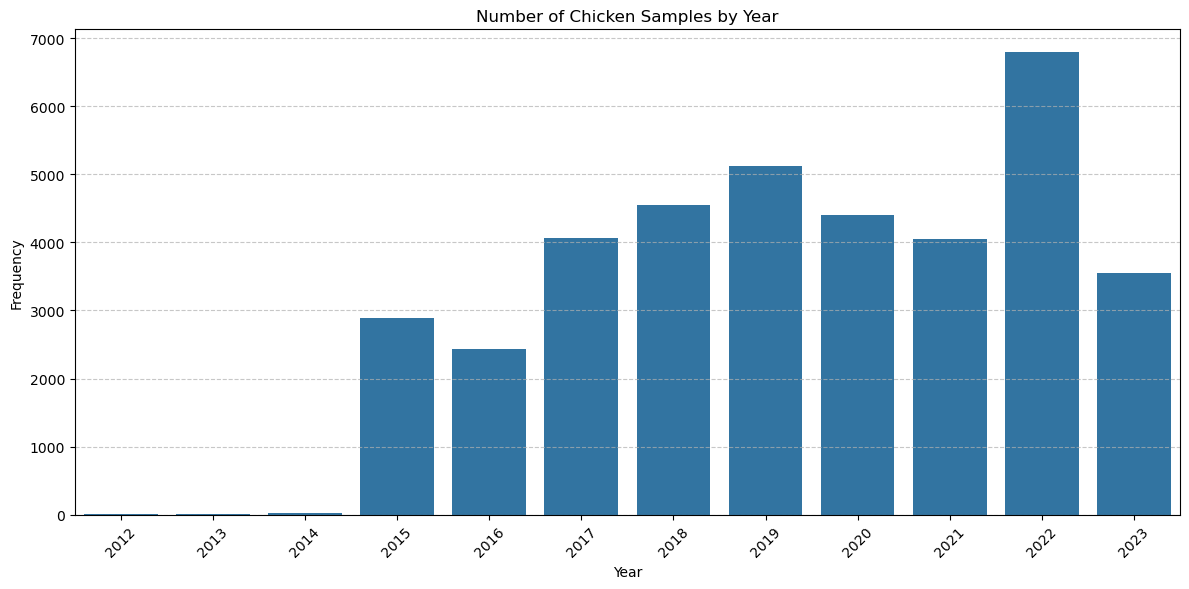

In [114]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Create date' to datetime and extract year
df_chicken['2012'] = pd.to_datetime(df_chicken['Create date']).dt.year

# Count frequency of samples per year
year_counts_chicken = df_chicken['2012'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(12, 6))
# Changed from year_counts.index to year_counts_chicken.index to use the correct variable
sns.barplot(x=year_counts_chicken.index, y=year_counts_chicken.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Salmonella isolated from chicken by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [116]:
from rapidfuzz import fuzz
import pandas as pd

salmonella_df['Isolation source'] = salmonella_df['Isolation source'].astype(str)
threshold = 80
df_pork = salmonella_df[salmonella_df['Isolation source'].apply(lambda x: fuzz.partial_ratio(x.lower(), 'pork') >= threshold)]
print(df_pork['Isolation source'].unique())

['Pork carcasses' 'raw pork sausage' 'raw pork loin' 'pork'
 'pork carcass swab from slaughterhouse' 'Pork meat' 'Pork carcass'
 'pork beef and roasted frankfurter'
 'smoked salted pork meat (Sus scrofa)' 'pork fillet (Sus scrofa)'
 'pork rib (Sus scrofa)' 'pork meat (Sus scrofa)' 'pork sausage'
 'dried pork ear' 'smoked pork cartlidge pet treat' 'porcine' 'Pork'
 'Porcine Feces (Sus scrofa domesticus)' 'dried pork ears' 'Raw pork'
 'Instant pork' 'pork dog chews' 'rolled pork skin' 'PORK'
 'pork & cabbage dumplings' 'pork meat' 'Porcine tongue' 'minced pork'
 'Pork from wild market' 'Pork from supermarket' 'Pork &Cabbage Dumplings'
 'pork from market' 'Frozen raw ground pork' 'pork chorizo' 'porcine meat'
 'port salut cheese' 'pork product' 'porc saussage' 'porc meat'
 'Animal, pork' 'Food, pork' 'Swine, Food, Pork sausage' 'Food (pork)'
 'Food, Raw Pork' 'Swine, Food, Pork' 'Swine, Food, Pork Salami'
 'Unspecified Meat, Food, Pork' 'Porcine necropsy - Swab' 'porcine feces'
 'Pork - R

C:\Users\Betha\AppData\Local\Temp\ipykernel_12380\1193073236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pork['2012'] = pd.to_datetime(df_pork['Create date']).dt.year


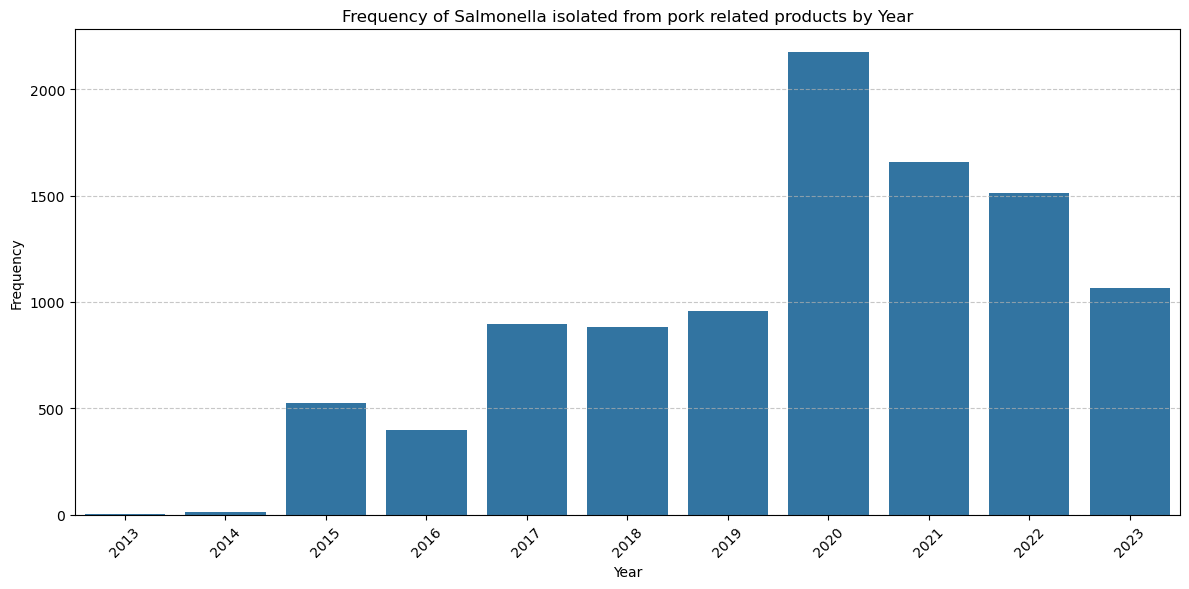

In [118]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Create date' to datetime and extract year
df_pork['2012'] = pd.to_datetime(df_pork['Create date']).dt.year

# Count frequency of samples per year
year_counts_pork = df_pork['2012'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(12, 6))
# Changed from year_counts.index to year_counts_chicken.index to use the correct variable
sns.barplot(x=year_counts_pork.index, y=year_counts_pork.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Salmonella isolated from pork related products by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

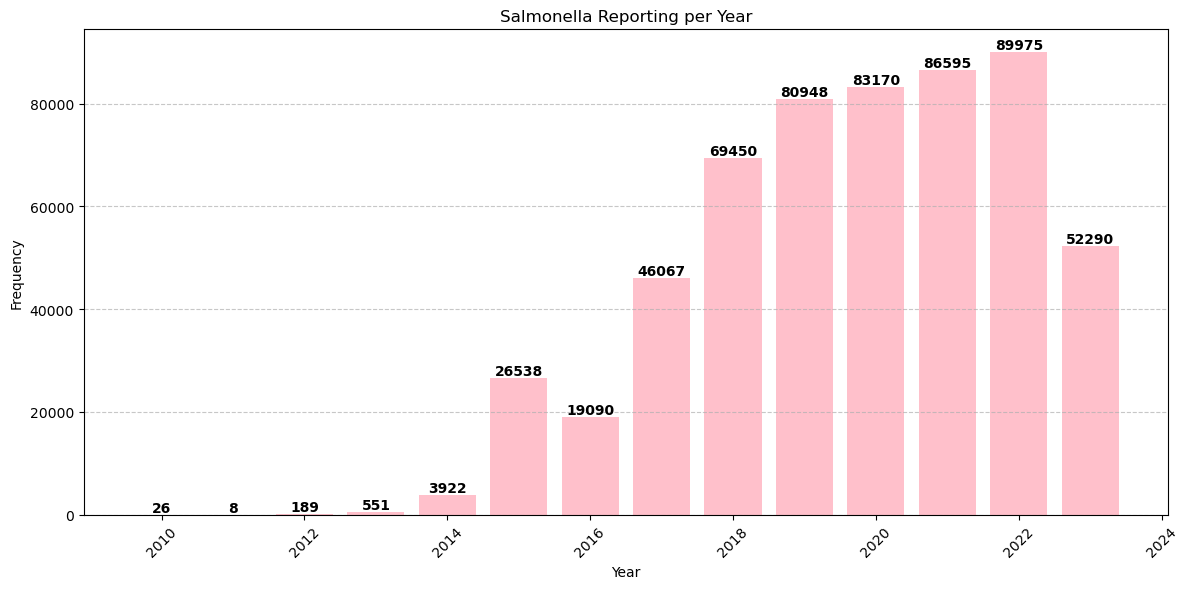

In [127]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'salmonella_df' with a date column named 'Create date'
# Step 1: Convert date column to datetime first
salmonella_df['Create date'] = pd.to_datetime(salmonella_df['Create date'])

# Step 2: Extract year from the datetime column
# Now we can use .dt accessor because 'Create date' is in datetime format
salmonella_df['year'] = salmonella_df['Create date'].dt.year

# Step 3: Count frequency of data per year
year_counts = salmonella_df['year'].value_counts().sort_index()

# Step 4: Create bar plot
plt.figure(figsize=(12, 6))

# Option 1: Using matplotlib
plt.bar(year_counts.index, year_counts.values)

# Option 2: Using seaborn (uncomment to use)
# sns.barplot(x=year_counts.index, y=year_counts.values)

bars = plt.bar(year_counts.index, year_counts.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,  # x position (center of the bar)
        height + 0.1,                       # y position (slightly above the bar)
        f'{int(height)}',                   # text (the value, converted to integer)
        ha='center',                        # horizontal alignment
        va='bottom',                        # vertical alignment
        fontweight='bold'                   # make the text bold
    )
# Step 5: Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Salmonella Reporting per Year')

# Step 6: Customize the plot (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

bars = plt.bar(year_counts.index, year_counts.values, color='pink')


# Step 7: Adjust layout and display
plt.tight_layout()
plt.show()